# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

Импортируем необходимые для работы библиотеки и инструменты:

In [1]:
# библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# инструменты sklearn
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor

# блокиратор предупреждений
import warnings
warnings.filterwarnings("ignore")

### Загрузка данные и их изучение:

In [2]:
data_train=pd.read_csv('/datasets/gold_recovery_train_new.csv') 
data_test=pd.read_csv('/datasets/gold_recovery_test_new.csv') 
data_full=pd.read_csv('/datasets/gold_recovery_full_new.csv') 

datas = [data_train, data_test, data_full] # список фреймов для дальнейшего удобства

Ознакомимся с полученными данными:

In [3]:
for data in datas:
    display(data.sample(3))
    print()
    data.info()
    print()
    print("Явных дубликатов - ", data.duplicated().sum())
    print()
    print("Количество пропусков \n", data.isna().sum().sort_values())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
12718,2018-06-05 18:59:59,4.859689,9.682902,7.101273,45.242890,76.387438,10.097047,1.949598,11.592938,2.057834,...,30.042606,-499.078307,22.052211,-500.113089,25.023346,-498.948818,22.998690,-499.872936,24.991905,-497.436319
4821,2017-01-06 21:59:59,3.554558,12.202148,13.827148,44.528214,67.275195,7.958822,4.226074,9.827148,3.199278,...,16.984524,-496.641588,14.952960,-535.479797,19.088193,-504.315013,7.946953,-500.415405,19.985514,-592.337973
14015,2018-08-12 16:59:59,4.504241,8.503872,10.481533,46.234401,65.103940,15.735038,4.557363,10.388761,4.248999,...,22.994606,-501.432013,19.954187,-501.014254,17.939761,-499.848000,13.007170,-500.230464,20.013978,-500.081425



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
3960,2017-11-02 20:59:59,211.308986,9.536964,6.990000,1.673338,1700.501446,-499.175303,1699.778698,-484.013076,1510.752315,...,19.956543,-500.674254,17.922203,-499.980414,13.991605,-500.391654,10.010983,-500.209311,14.004925,-499.979686
1090,2016-10-26 13:59:59,157.850055,5.529645,7.450000,0.694472,1603.568684,-499.490719,1702.150345,-500.116632,1704.657274,...,20.008170,-500.337493,16.948830,-499.893808,17.005386,-498.764392,13.983128,-498.380445,24.998246,-499.338909
2013,2016-12-05 16:59:59,190.449385,7.998456,8.095833,1.081913,1505.075031,-500.103148,1501.800984,-500.307951,1502.354084,...,17.993872,-500.328736,16.014036,-502.099469,16.379003,-500.282798,11.979172,-500.336410,22.025024,-500.410557



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_cle

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
746,2016-02-18 06:00:00,5.174911,10.052502,0.878757,45.387492,48.457717,11.348603,1.339284,9.329042,2.762683,...,18.013293,-500.807629,15.960071,-498.559282,15.981028,-500.743773,11.969354,-500.391553,26.993228,-499.643476
15779,2018-02-19 11:59:59,6.962200,9.492547,8.849968,42.781001,85.599596,10.177961,0.632094,12.826802,1.346970,...,19.980553,-500.728265,15.061789,-500.211871,10.983475,-500.307512,9.009618,-499.908101,10.953487,-500.740903
822,2016-02-21 16:00:00,6.217621,12.101341,10.505616,40.133280,75.456722,13.610811,2.520647,8.083634,3.191058,...,11.931964,-400.564899,10.119927,-399.699247,9.981872,-401.047455,8.008695,-399.547018,28.021031,-400.002828



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64

- Явных дубликатов в данных нет
- Пропущенные значения имеются во всех трех таблицах, но их количество относительно невелико
- В тестовой выборке отсутствует 34 столбца с параметрами, которые замеряются/рассчитываются позже

### Проверка правильности расчета эффективности обогащения

Необходимо вычислить эффективность обогащения на обучающей выборке для признака **rougher.output.recovery**, найти MAE между расчётами и значением признака.

Для расчета нам понадобятся данные из столбцов *rougher.output.recovery, rougher.output.concentrate_au, rougher.input.feed_au, rougher.output.tail_au* обучающей выборки. Для расчетов создадим новый фрейм с этими данными, удалим строки с пропущенными значениями, создадим столбец с результатами наших расчетов и найдем значение МАЕ:

In [4]:
data_recovery = data_train[['rougher.output.recovery',
                           'rougher.output.concentrate_au',
                           'rougher.input.feed_au',
                           'rougher.output.tail_au']]
data_recovery.dropna(inplace=True) # избавимся от пропусков

C = data_recovery['rougher.output.concentrate_au'] # используем имена переменных согласно формуле
F = data_recovery['rougher.input.feed_au']
T = data_recovery['rougher.output.tail_au']

data_recovery['rougher.output.recovery_calc'] = (C * (F - T)) / (F * (C - T)) * 100

mae = mean_absolute_error(data_recovery['rougher.output.recovery'], data_recovery['rougher.output.recovery_calc'])
print(f"МАЕ между нашими расчетными значениями и значениями признака ~ {mae:.17f}" ) # без "е" нагляднее 

МАЕ между нашими расчетными значениями и значениями признака ~ 0.00000000000000974


Средняя абсолютная ошибка МАЕ расчетов эффективности обогащения ничтожно мала, значит расчеты *recovery* выполнены верно.

### Отсутствующие признаки в тестовой выборке

In [5]:
columns_not_in_test = set(data_train.columns) - set(data_test.columns)
display(columns_not_in_test, len(columns_not_in_test))

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

34

- Отсутствующие признаки - это выходные параметры материалов после определенных этапов технологического процесса
- Из 34 отсутствующих признаков, 30 относятся к результатам замеров и только 4 к расчетным характеристикам
- Отсутствует 2 целевых признака **final.output.recovery** и **rougher.output.recovery**

### Предобработка данных

Для проведения последующего анализа данных необходимо:
- тестовую выборку дополнить столбцами с целевыми признаками final.output.recovery и rougher.output.recovery
- сократить обучающую выборку, удалив отсутствующие в тестовой выборке признаки
- заполнить пропуски в обучающей и тестовой выборках

In [6]:
# методом .merge дополним тестовую выборку целевыми признаками
data_test_new = data_test.merge(right = data_full[['final.output.recovery','date']], how='left', on='date')
data_test_new = data_test_new.merge(right = data_full[['rougher.output.recovery','date']], how='left', on='date')

# оставим в обучающей выборке колонки, которые присутствуют в тестовой
data_train_new = data_train[list(data_test_new.columns)]
print("Размер обучающей выборки ", data_train_new.shape, "\nРазмер тестовой выборки ", data_test_new.shape)


Размер обучающей выборки  (14149, 55) 
Размер тестовой выборки  (5290, 55)


Поскольку данные индексируются датой и временем получения информации (признак date), а соседние по времени параметры часто похожи, пропуски в выборках можно заменить на предыдущие по времени значения:

In [7]:
data_train_new = data_train_new.fillna(method='ffill')
data_test_new = data_test_new.fillna(method='ffill')
data_train_new.info()
data_test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        14149 non-null  object 
 1   primary_cleaner.input.sulfate               14149 non-null  float64
 2   primary_cleaner.input.depressant            14149 non-null  float64
 3   primary_cleaner.input.feed_size             14149 non-null  float64
 4   primary_cleaner.input.xanthate              14149 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      14149 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    14149 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      14149 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    14149 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      14149 non-null  float64
 10  primary_cl

Итоговые выборки не имеют пропущенных значений, количество признаков в обеих выборках совпадает, данные готовы для дальнейшего исследования.

## Анализ данных

### Изменение концентрация металлов (Au, Ag, Pb) на различных этапах очистки

Создадим отдельные выборки по указанным металлам и построим для каждого из них гистограммы, визуализирующие изменения концентрации на каждом этапе очистки:

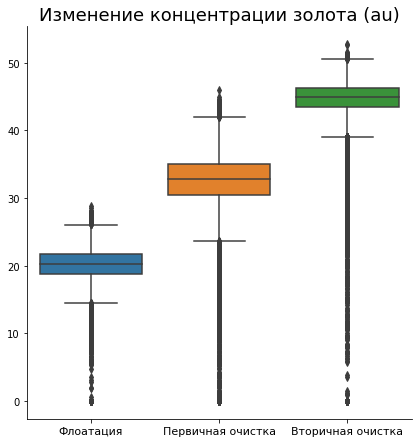

In [8]:
concentration_au = data_full[['rougher.output.concentrate_au',
                              'primary_cleaner.output.concentrate_au',
                              'final.output.concentrate_au']]
sns.catplot(data = concentration_au, height = 6, kind = 'box').set_xticklabels(
    ['Флоатация', 'Первичная очистка', 'Вторичная очистка'], fontsize=11)

plt.title("Изменение концентрации золота (au)", fontsize = 18) 
plt.show()

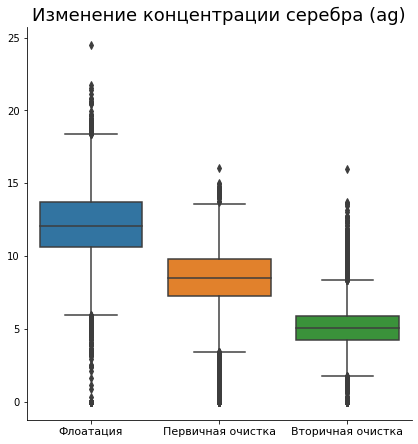

In [9]:
concentration_ag = data_full[['rougher.output.concentrate_ag',
                              'primary_cleaner.output.concentrate_ag',
                              'final.output.concentrate_ag']]
sns.catplot(data = concentration_ag, height = 6, kind = 'box').set_xticklabels(
    ['Флоатация', 'Первичная очистка', 'Вторичная очистка'], fontsize=11)

plt.title("Изменение концентрации серебра (ag)", fontsize = 18) 
plt.show()

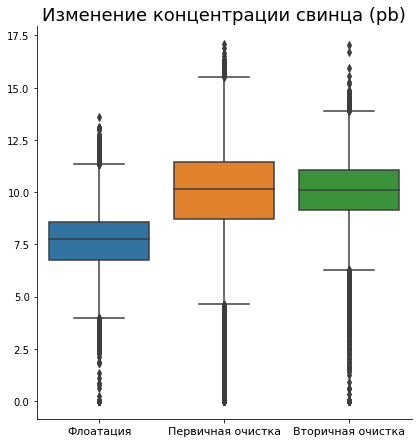

In [10]:
concentration_pb = data_full[['rougher.output.concentrate_pb',
                              'primary_cleaner.output.concentrate_pb',
                              'final.output.concentrate_pb']]
sns.catplot(data = concentration_pb, height = 6, kind = 'box').set_xticklabels(
    ['Флоатация', 'Первичная очистка', 'Вторичная очистка'], fontsize=11)

plt.title("Изменение концентрации свинца (pb)", fontsize = 18) 
plt.show()

**ВЫВОД:**
- **Золото**: с каждым последующим этапом очистки концентрация золота увеличивается, что логично для исследуемого техпроцесса
- **Серебро**: с каждым последующим этапом очистки концентрация серебра уменьшается, уменьшается и разброс значений, но при этом остается большое корличество выбросов
- **Свинец**: после этапа первичной очистки концентрация свинца увеличивается и остается такой до финальной стадии, при этом, также как и с серебром, разброс значений уменьшается, сохранятеся большое количество выбросов

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

Создадим таблицу из значений с размерами гранул сырья обучающей и тестовой выборки, сравним их статистические данные и для наглядности распределения размеров гранул построим графики:

In [11]:
granule_size = pd.concat([data_train_new['rougher.input.feed_size'],
                          data_test_new['rougher.input.feed_size']], axis=1) 
granule_size.describe()

,rougher.input.feed_size,rougher.input.feed_size
count,14149.000000,5290.000000
mean,60.239856,55.952754
std,23.005310,19.080334
min,9.659576,0.046369
25%,48.966751,43.906504
50%,55.269784,50.846843
75%,66.007526,62.451165
max,484.967466,392.494040


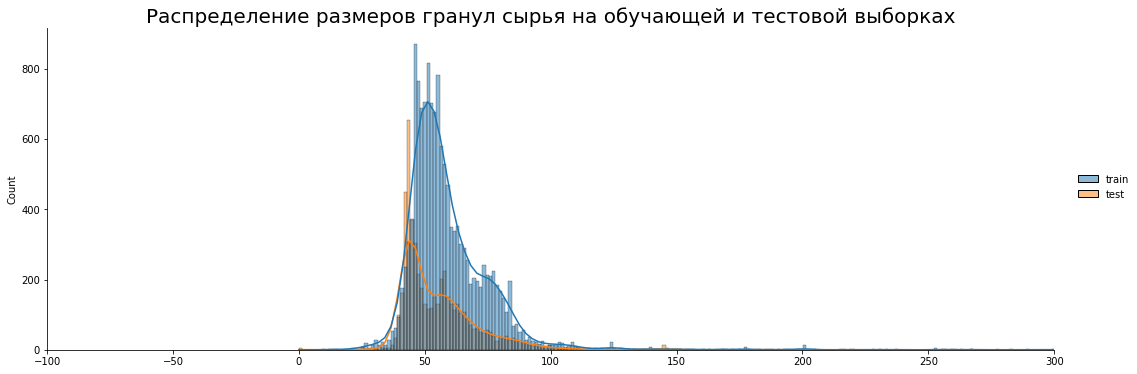

In [12]:
granule_size.columns = ['train', 'test']
sns.displot(granule_size, legend=True, kde=True, height=5, aspect=3)
plt.title('Распределение размеров гранул сырья на обучающей и тестовой выборках', fontsize=20)
plt.xlim([-100, 300])
plt.show()

**ВЫВОД**:
- Распределения размеров гранул сырья на обучающей и тестовой выборках слабо отличаются, мы видим это по средним значениям, медианам и квартилям, так же наблюдаем на графиках, различия не должны влиять на оценку модели.

###  Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

Суммируем значения концентрации веществ (золота, серебра, свинца и солей) на разных стадиях: в сырье, в черновом и финальном концентратах, построим графики для каждого из этапов:

In [13]:
data_full['raw_material'] = data_full[['rougher.input.feed_au',
                              'rougher.input.feed_ag',
                              'rougher.input.feed_pb',
                              'rougher.input.feed_sol']].sum(axis=1)

data_full['rougher_concentrate'] = data_full[['rougher.output.concentrate_au',
                              'rougher.output.concentrate_ag',
                              'rougher.output.concentrate_pb',
                              'rougher.output.concentrate_sol']].sum(axis=1)

data_full['final_concentrate'] = data_full[['final.output.concentrate_au',
                              'final.output.concentrate_ag',
                              'final.output.concentrate_pb',
                              'final.output.concentrate_sol']].sum(axis=1)

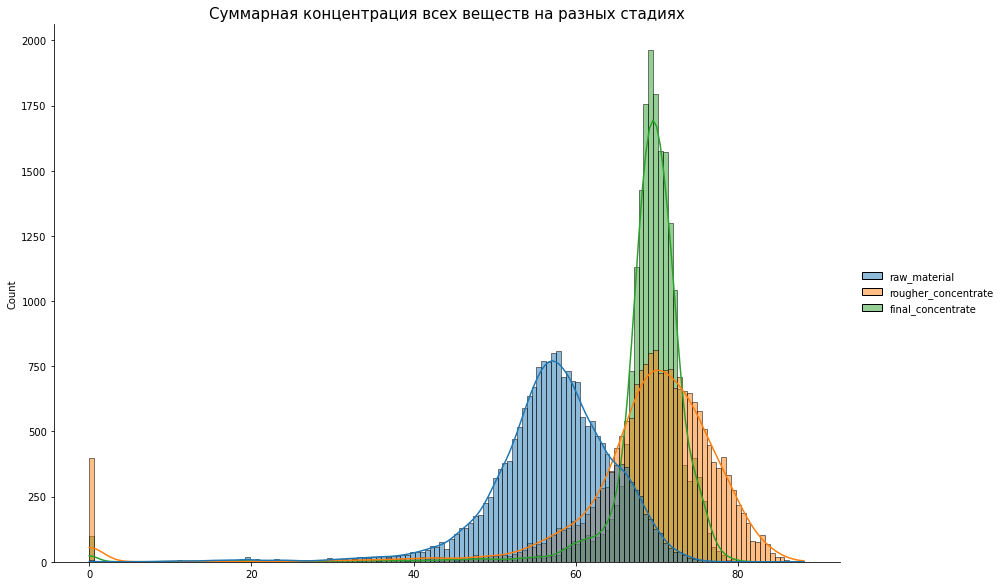

In [14]:
sns.displot(data_full[['raw_material', 'rougher_concentrate', 'final_concentrate']],
            legend=True, kde=True, height=8, aspect=1.5)  
plt.title('Суммарная концентрация всех веществ на разных стадиях', fontsize=15)
plt.show()

На графике видна аномалия - суммарная концентрация веществ на разных этапах равна 0 либо близко к 0, физически такое невозможно ни на одном из этапов. Видимо значения с нулевой (или близкой) к нулевой суммарной концентрацией - это какие-то ошибки при сборе данных, т.е. мусор, от которого следует избавиться. 

Увеличим масштаб графика для определения границ выбросов:

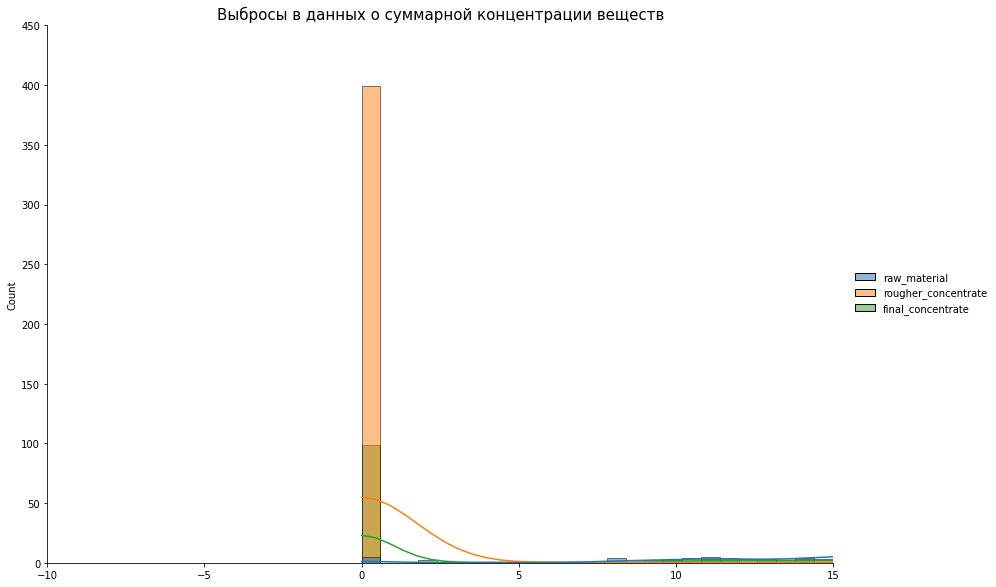

In [15]:
sns.displot(data_full[['raw_material', 'rougher_concentrate', 'final_concentrate']],
            legend=True, kde=True, height=8, aspect=1.5)  
plt.title('Выбросы в данных о суммарной концентрации веществ', fontsize=15)
plt.xlim([-10, 15])
plt.ylim([0, 450])
plt.show()

In [16]:
sum_emissions = (len(data_full[data_full['raw_material'] <= 5]) +
             len(data_full[data_full['rougher_concentrate'] <= 5]) + 
             len(data_full[data_full['final_concentrate'] <= 5]))
sum_emissions

508

Видно, что аномальные значения заканчиваются примерно на 5, всего в исходных данных таких значений 508. Эти значения следует удалить из обучающей и тестовой выборок, дабы качество будущей модели не пострадало от таких значений:

In [17]:
data_full_good = data_full[(data_full['raw_material'] >  5) &
                           (data_full['rougher_concentrate'] > 5) & 
                           (data_full['final_concentrate'] > 5)]

Сделаем индексами столбец **date** для удаления выбросов из обучающей и тестовой выборок:

In [18]:
for data in [data_full_good, data_train_new, data_test_new]:
    data.set_index('date')

data_train_new = data_train_new[data_train_new['date'].isin(data_full_good['date'])]
data_test_new = data_test_new[data_test_new['date'].isin(data_full_good['date'])]

data_train_new.dropna(inplace=True) # удаляем пропуски
data_test_new.dropna(inplace=True) 

**ВЫВОД:**
- Исследование суммарной концентрации веществ показало, что в данных имелись явные выбросы
- Избавились от этих значений в обучающей и тестовой выборке для улучшения качества модели

## Модель

### Функция для вычисления итоговой sMAPE

In [19]:
def smape(target, predictions):
    smape = ((1 / len(target)) * ((abs(predictions - target)) / ((abs(target) + abs(predictions)) / 2))).sum() * 100
    return smape

def total_smape (smape_rougher, smape_final):
    total_smape = 0.25 * smape_rougher + 0.75 * smape_final
    return total_smape

###  Обучение моделей и оценка их качества кросс-валидацией

Выделим признаки и целевые признаки (их 2) для обучающей и тестовой выборок, сохраним их в отдельные переменные:

In [20]:
# train
target_rougher_train = data_train_new['rougher.output.recovery']
target_final_train = data_train_new['final.output.recovery']
features_train = data_train_new.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

# test
target_rougher_test = data_test_new['rougher.output.recovery']
target_final_test = data_test_new['final.output.recovery']
features_test = data_test_new.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

#### Линейная регрессия

Проведем масштабирование признаков и обучим модель на обучающей выборке:

In [21]:
numeric = features_train.columns
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [22]:
scorer = make_scorer(smape, greater_is_better=False) 
    
cross_val_score_rougher = cross_val_score(LinearRegression(),
                                          features_train,
                                          target_rougher_train,
                                          cv=4, scoring=scorer).mean()

cross_val_score_final = cross_val_score(LinearRegression(),
                                        features_train,
                                        target_final_train,
                                        cv=4, scoring=scorer).mean()

total_smape_result = total_smape(cross_val_score_rougher, cross_val_score_final)

print(f"sMAPE для модели \"Линейной регрессии\" ~ {abs(total_smape_result):.3f}")

sMAPE для модели "Линейной регрессии" ~ 10.141


#### Дерево решений

In [23]:
cross_val_score_rougher = cross_val_score(DecisionTreeRegressor(random_state=12345),
                                          features_train,
                                          target_rougher_train,
                                          cv=4, scoring=scorer).mean()

cross_val_score_final = cross_val_score(DecisionTreeRegressor(random_state=12345),
                                        features_train,
                                        target_final_train,
                                        cv=4, scoring=scorer).mean()

total_smape_result = total_smape(cross_val_score_rougher, cross_val_score_final)

print(f"sMAPE для модели \"Дерево решений\" ~ {abs(total_smape_result):.3f}")

sMAPE для модели "Дерево решений" ~ 14.829


#### Случайный лес

In [24]:
best_est = 0
best_depth = 0
best_smape = 100
for depth in range(2, 3): #сократил поиск прогнав заранее
    
    for estimator in range(24, 25):
        
        model = RandomForestRegressor(random_state=12345, 
                                       n_estimators=estimator, 
                                       max_depth=depth)
        
        scorer = make_scorer(smape, greater_is_better=False) 
    
        cross_val_score_rougher = cross_val_score(model, features_train, target_rougher_train, cv=4, scoring=scorer).mean()
        cross_val_score_final = cross_val_score(model, features_train, target_final_train, cv=4, scoring=scorer).mean()

        total_smape_result = total_smape(cross_val_score_rougher, cross_val_score_final)
        smape_n = abs(total_smape_result)
        if smape_n < best_smape:
            best_est = estimator
            best_depth = depth
        
print(f"sMAPE для модели \"Случайный лес\" ~ {abs(total_smape_result):.3f}")
print(best_est)
print(best_depth)

sMAPE для модели "Случайный лес" ~ 9.377
24
2


Модель "Случайный лес" с параметрами n_estimators = 24, max_depth = 2 показала лучший результат по метрике sMAPE. Используем эту модель с указанными гиперпараметрами для тестовой выборки:

In [25]:
model_final = RandomForestRegressor(random_state=12345, 
                                       n_estimators=24, 
                                       max_depth=2)

model_final.fit(features_train, target_rougher_train)
predictions_rougher = model_final.predict(features_test)

model_final.fit(features_train, target_final_train)
predictions_final = model_final.predict(features_test)

smape_rougher = smape(target_rougher_test, predictions_rougher)
smape_final = smape(target_final_test, predictions_final)

total_smape_result = total_smape(smape_rougher, smape_final)

print(f"sMAPE для модели \"Случайный лес\ на тестовой выборке ~ {abs(total_smape_result):.3f}")

sMAPE для модели "Случайный лес\ на тестовой выборке ~ 6.986


Для тестовой выборки итоговая модель показала неплохой результат по метрике sMAPE ~ 6.986, для проверки выбранной модели на адекватность сравним показатели с работой константной модели Dummy: 

In [26]:
model = DummyRegressor(strategy='mean')

model.fit(features_train, target_rougher_train)
predictions_rougher = model.predict(features_test)

model.fit(features_train, target_final_train)
predictions_final = model.predict(features_test)

smape_rougher= smape(target_rougher_test, predictions_rougher)
smape_final= smape(target_final_test, predictions_final)

total_smape_result = total_smape(smape_rougher, smape_final)

print(f"sMAPE константной модели ~ {abs(total_smape_result):.3f}")

sMAPE константной модели ~ 7.766


**ВЫВОД:**
- результат выбранной нами модели Случайного леса с подобранными гиперпараметрами лучше результата константной модели по метрике качества sMAPE (симметричное среднее абсолютное процентное отклонение), значит построенная нами модель вполне способна качественно решить поставленную задачу